# 抖音电商数据分析

**数据来源**: https://tianchi.aliyun.com/dataset/204698

## 项目介绍

### 项目背景与目标

使用Python对抖音电商数据集的用户数据进行用户分析。此数据集有1000条数据，每条数据都是一个用户的行为信息。


### 工具与技术栈

- 数据清洗与处理：Pandas
- 数据分析：Python

## 数据理解


In [52]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('data/user_personalized_features.csv')
data.shape

(1000, 14)

In [3]:
data.head()

,User_ID,Age,Gender,Location,Income,Interests,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference,Time_Spent_on_Site_Minutes,Pages_Viewed,Newsletter_Subscription
0,#1,56,Male,Suburban,66266,Sports,5,7,528.285714,3698,Books,584,38,True
1,#2,46,Female,Rural,30581,Technology,15,1,567.000000,567,Electronics,432,40,False
2,#3,32,Female,Suburban,109943,Sports,28,7,475.285714,3327,Apparel,306,1,True
3,#4,60,Female,Suburban,91369,Fashion,18,6,450.500000,2703,Apparel,527,29,False
4,#5,25,Male,Suburban,49255,Travel,2,19,145.105263,2757,Health & Beauty,53,10,True


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   User_ID                      1000 non-null   object 
 1   Age                          1000 non-null   int64  
 2   Gender                       1000 non-null   object 
 3   Location                     1000 non-null   object 
 4   Income                       1000 non-null   int64  
 5   Interests                    1000 non-null   object 
 6   Last_Login_Days_Ago          1000 non-null   int64  
 7   Purchase_Frequency           1000 non-null   int64  
 8   Average_Order_Value          1000 non-null   float64
 9   Total_Spending               1000 non-null   int64  
 10  Product_Category_Preference  1000 non-null   object 
 11  Time_Spent_on_Site_Minutes   1000 non-null   int64  
 12  Pages_Viewed                 1000 non-null   int64  
 13  Newsletter_Subscrip

In [5]:
data.describe()

,Age,Income,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Time_Spent_on_Site_Minutes,Pages_Viewed
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,40.986000,58947.195000,15.586000,7.337000,837.780763,2437.13600,297.360000,24.40300
std,13.497852,40045.196321,8.205604,5.356503,1317.512474,1563.54753,175.596123,14.02017
min,18.000000,27.000000,1.000000,1.000000,1.384615,6.00000,2.000000,1.00000
25%,29.000000,23930.750000,8.000000,2.000000,157.716387,1257.50000,144.000000,12.00000
50%,42.000000,53512.000000,16.000000,7.000000,343.625000,2346.50000,292.500000,24.50000
75%,52.000000,91237.750000,23.000000,11.000000,873.750000,3298.50000,449.250000,36.00000
max,64.000000,149619.000000,29.000000,20.000000,10101.000000,10256.00000,599.000000,49.00000


In [6]:
# 查看是否有重复值
data.duplicated().sum()

0

**字段理解**：

1. User_ID：每个用户的唯一标识符
2. Age：用户的年龄
3. Gender：用户的性别 —— **分类型数据**
4. Location：用户所在地区：郊区、农村、城市 —— **分类型数据**
5. Income：用户的收入水平 —— **数值型数据**
6. Interests：用户的兴趣，如运动、时尚、技术等。—— **分类型数据**
7. Last_Login_Days_Age：用户上次登录以来的天数 —— **数值型数据**
8. Purchase_Frequency：用户进行购买的频率 —— **数值型数据**
9. Average_Order_Value：用户下单的平均价值 —— **数值型数据**
10. Total_Spending：用户消费的总金额 —— **数值型数据**
11. Product_Category_Preference：用户偏好的特定产品类别 —— **分类型数据**
12. Time_Spent_on_Site_Minutes：用户在登录状态的时间 —— **数值型数据**
13. Pages_Viewed：用户在访问期间浏览的页面数量——**数值型数据**
14. Newsletter_Subscription：用户是否订阅了营销活动通知——**分类型数据**

In [7]:
# 分类型数据的类别
print(f"Gender:")
print(data['Gender'].unique())

print(f"Location:")
print(data['Location'].unique())

print(f"Interests:")
print(data['Interests'].unique())

print(f"Product Category Preferences:")
print(data['Product_Category_Preference'].unique())

print(f"Newsletter Subscription:")
print(data['Newsletter_Subscription'].unique())

Gender:
['Male' 'Female']
Location:
['Suburban' 'Rural' 'Urban']
Interests:
['Sports' 'Technology' 'Fashion' 'Travel' 'Food']
Product Category Preferences:
['Books' 'Electronics' 'Apparel' 'Health & Beauty' 'Home & Kitchen']
Newsletter Subscription:
[ True False]


## 数据处理

In [8]:
# 对User id进行处理
data['User_ID'] = data['User_ID'].apply(lambda x: x.strip('#'))

# 对Average Order Value进行处理
data['Average_Order_Value'] = data['Average_Order_Value'].apply(lambda x: round(x,2))

data.head()

,User_ID,Age,Gender,Location,Income,Interests,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference,Time_Spent_on_Site_Minutes,Pages_Viewed,Newsletter_Subscription
0,1,56,Male,Suburban,66266,Sports,5,7,528.29,3698,Books,584,38,True
1,2,46,Female,Rural,30581,Technology,15,1,567.00,567,Electronics,432,40,False
2,3,32,Female,Suburban,109943,Sports,28,7,475.29,3327,Apparel,306,1,True
3,4,60,Female,Suburban,91369,Fashion,18,6,450.50,2703,Apparel,527,29,False
4,5,25,Male,Suburban,49255,Travel,2,19,145.11,2757,Health & Beauty,53,10,True


## 数据分析

### 用户分类 - RFM模型

In [9]:
rfm_data = data[['User_ID','Last_Login_Days_Ago','Purchase_Frequency','Total_Spending']].rename(columns={'Last_Login_Days_Ago':'R','Purchase_Frequency':'F','Total_Spending':'M'})
print(f"R取值范围:{rfm_data['R'].min()} - {rfm_data['R'].max()}")
print(f"F取值范围:{rfm_data['F'].min()} - {rfm_data['F'].max()}")
print(f"M取值范围:{rfm_data['M'].min()} - {rfm_data['M'].max()}")

R取值范围:1 - 29
F取值范围:1 - 20
M取值范围:6 - 10256


In [10]:
rfm_data['r_score'] = pd.qcut(rfm_data['R'], q=5,  labels=list(range(5,0,-1))).astype(int)
rfm_data['f_score'] = pd.qcut(rfm_data['F'], q=5, labels=list(range(1,6))).astype(int)
rfm_data['m_score'] = pd.qcut(rfm_data['M'], q=5,labels=list(range(1,6))).astype(int)

In [11]:
r_mean = rfm_data['r_score'].mean()
f_mean = rfm_data['f_score'].mean()
m_mean = rfm_data['m_score'].mean()

In [12]:
def category(x):
    if x['m_score'] > m_mean:
        if (x['r_score'] > r_mean)&(x['f_score'] > f_mean):
            return '重要价值用户'
        elif (x['r_score'] > r_mean)&(x['f_score'] <= f_mean):
            return '重要发展用户'
        elif (x['r_score'] <= r_mean)&(x['f_score'] > f_mean):
            return '重要保持用户'
        elif (x['r_score'] <= r_mean)&(x['f_score'] <= f_mean):
            return '重要挽留用户'
    else:
        if (x['r_score'] > r_mean)&(x['f_score'] > f_mean):
            return '一般价值用户'
        elif (x['r_score'] > r_mean)&(x['f_score'] <= f_mean):
            return '一般发展用户'
        elif (x['r_score'] <= r_mean)&(x['f_score'] > f_mean):
            return '一般保持用户'
        elif (x['r_score'] <= r_mean)&(x['f_score'] <= f_mean):
            return '一般挽留用户'

rfm_data['user_category'] = rfm_data.apply(lambda x: category(x), axis=1)
rfm_data.head()

,User_ID,R,F,M,r_score,f_score,m_score,user_category
0,1,5,7,3698,5,3,5,重要价值用户
1,2,15,1,567,3,1,1,一般挽留用户
2,3,28,7,3327,1,3,4,重要保持用户
3,4,18,6,2703,3,3,3,一般保持用户
4,5,2,19,2757,5,5,4,重要价值用户


In [13]:
rfm_data['user_category'].value_counts()

user_category
一般保持用户    201
一般价值用户    154
一般挽留用户    137
重要挽留用户    126
重要保持用户    115
一般发展用户    108
重要价值用户     84
重要发展用户     75
Name: count, dtype: int64

### 用户画像

In [14]:
data = pd.merge(data, rfm_data[['User_ID','user_category']], on='User_ID', how='left')
data.head()

,User_ID,Age,Gender,Location,Income,Interests,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference,Time_Spent_on_Site_Minutes,Pages_Viewed,Newsletter_Subscription,user_category
0,1,56,Male,Suburban,66266,Sports,5,7,528.29,3698,Books,584,38,True,重要价值用户
1,2,46,Female,Rural,30581,Technology,15,1,567.00,567,Electronics,432,40,False,一般挽留用户
2,3,32,Female,Suburban,109943,Sports,28,7,475.29,3327,Apparel,306,1,True,重要保持用户
3,4,60,Female,Suburban,91369,Fashion,18,6,450.50,2703,Apparel,527,29,False,一般保持用户
4,5,25,Male,Suburban,49255,Travel,2,19,145.11,2757,Health & Beauty,53,10,True,重要价值用户


In [15]:
profile = data.groupby('user_category').agg(
    total_cnt = ('User_ID','count'),
    avg_age = ('Age', lambda x: x.mean().round(2)),
    dominant_gender = ('Gender', lambda x: x.mode().iloc[0] if not x.mode().empty else None),
    avg_income = ('Income',lambda x: x.mean().round(2)),
    dominant_location = ('Location',lambda x: x.mode().iloc[0] if not x.mode().empty else None),
    avg_log_gap = ('Last_Login_Days_Ago',lambda x: x.mean().round(2)),
    avg_total_spending = ('Total_Spending',lambda x: x.mean().round(2)),
    avg_time = ('Time_Spent_on_Site_Minutes',lambda x: x.mean().round(2)),
    top_product = ('Product_Category_Preference',lambda x: x.mode().iloc[0] if not x.mode().empty else None),
    top_interest = ('Interests',lambda x: x.mode().iloc[0] if not x.mode().empty else None),
    subscription_percent = ('Newsletter_Subscription',lambda x: str(round(100*x.mean(),2))+"%")
).reset_index()

profile

,user_category,total_cnt,avg_age,dominant_gender,avg_income,dominant_location,avg_log_gap,avg_total_spending,avg_time,top_product,top_interest,subscription_percent
0,一般价值用户,154,39.36,Male,47555.81,Rural,7.46,1509.27,298.89,Apparel,Travel,51.95%
1,一般保持用户,201,40.18,Male,49527.08,Rural,21.50,1419.84,304.61,Electronics,Travel,51.74%
2,一般发展用户,108,41.67,Male,41472.07,Rural,7.21,1382.56,296.74,Books,Fashion,55.56%
3,一般挽留用户,137,41.67,Female,47646.88,Rural,21.57,1581.70,289.95,Electronics,Technology,48.18%
4,重要价值用户,84,41.08,Male,79510.98,Suburban,7.33,3484.71,292.40,Apparel,Food,52.38%
5,重要保持用户,115,41.92,Male,76850.43,Suburban,21.15,3478.37,320.60,Health & Beauty,Food,50.43%
6,重要发展用户,75,39.32,Female,71687.16,Suburban,7.47,4124.55,311.00,Electronics,Technology,52.0%
7,重要挽留用户,126,42.99,Male,77530.10,Suburban,22.01,4374.94,266.49,Apparel,Technology,44.44%


**用户画像**：

| 用户类别 | 画像描述 |
| --- | --- |
| 一般价值用户 | 中低收入农村中年男性（平均年龄39.36岁，收入47.5K），购买服饰和旅行类产品，人均GMV中等（1509.27），登录间隔较短（7.46天），复购率较高（51.95%），属于“稳定价值型”用户，但收入限制消费升级。 |
| 一般保持用户 | 中低收入农村中年男性（平均年龄40.18岁，收入49.5K），偏好电子产品和旅行，人均GMV中等（1419.84），但登录间隔较长（21.5天），复购率中等（51.74%），属于“低频保持型”用户，活跃度不足需唤醒。 |
| 一般发展用户 | 低收入农村中年男性（平均年龄41.67岁，收入41.4K），购买书籍和时尚类产品，人均GMV较低（1382.56），但登录间隔短（7.21天）且复购率高（55.56%），属于“高潜力发展型”用户，有消费增长空间。 |
| 一般挽留用户 | 中低收入农村中年女性（平均年龄41.67岁，收入47.6K），购买电子和科技类产品，人均GMV中等（1581.7），但登录间隔长（21.57天）且复购率低（48.18%），属于“流失风险型”用户，需紧急干预。 |
| 重要价值用户 | 中高收入郊区中年男性（平均年龄41.08岁，收入79.5K），购买服饰和食品类，人均GMV高（3484.71），登录间隔短（7.33天），复购率较高（52.38%），属于“高价值现金牛”用户，忠诚度高且活跃。 |
| 重要保持用户 | 中高收入郊区中年男性（平均年龄41.92岁，收入76.8K），偏好健康和美容类及食品，人均GMV高（3478.37），但登录间隔较长（21.15天），复购率中等（50.43%），属于“沉睡高价值”用户，需维持活跃度。 |
| 重要发展用户 | 中高收入郊区青年女性（平均年龄39.32岁，收入71.6K），购买电子和科技类产品，人均GMV高（4124.55），登录间隔短（7.47天），复购率较高（52.0%），属于“高潜力价值型”用户，可进一步挖掘消费潜力。 |
| 重要挽留用户 | 中高收入郊区中年男性（平均年龄42.99岁，收入77.5K），购买服饰和科技类产品，人均GMV高（4374.94），但登录间隔长（22.01天）且复购率低（44.44%），属于“高价值流失边缘”用户，需优先召回。 |

**营销策略**：

| 用户类别 | 营销目标 | 营销策略 |
| --- | --- | --- |
| 一般价值用户 | 提升消费频次和客单价，防止降级 | 1. 推出服饰和旅行类捆绑促销（如“买衣送旅行券”）；<br>2. 基于登录行为发送个性化推荐，突出性价比产品；<br>3. 实施积分奖励计划，鼓励频繁购买；<br>4. 通过短信/邮件推送限时折扣，刺激冲动消费。 |
| 一般保持用户 | 缩短登录间隔，提高活跃度 | 1. 发送电子产品和旅行类新品上市通知，搭配“回归礼包”；<br>2. 利用推送通知提醒未登录用户，提供专属优惠；<br>3. 开展“每周签到”活动，奖励连续登录；<br>4. 推荐相关内容（如旅行攻略），增强 engagement。 |
| 一般发展用户 | 扩大消费品类，提升GMV | 1. 针对书籍和时尚类推出“跨品类优惠券”，引导尝试新品类；<br>2. 基于高复购率，设计订阅服务（如月度书单）；<br>3. 推送时尚趋势内容，激发购买欲望；<br>4. 提供首次电子产品折扣，测试消费升级。 |
| 一般挽留用户 | 防止流失，重新激活 | 1. 发送“我们想念你”邮件，附电子和科技类高折扣券；<br>2. 实施赢回活动，如“回归即送现金券”；<br>3. 个性化推荐科技类新品或限量版，创造紧迫感；<br>4. 通过客服主动联系，了解流失原因并解决问题。 |
| 重要价值用户 | 维持高忠诚度，鼓励复购和交叉购买 | 1. 打造VIP会员计划，提供专属折扣和早期访问权；<br>2. 推荐服饰和食品类新品组合，提升客单价；<br>3. 发送生日/节日礼券，增强情感连接；<br>4. 邀请参与忠诚度调研，优化服务。 |
| 重要保持用户 | 恢复活跃度，防止流失 | 1. 推送健康和美容类个性化内容（如护肤技巧），搭配“活跃奖励”；<br>2. 设置登录挑战赛，奖励连续登录用户；<br>3. 提供高价值用户专属促销，如“买一送一”；<br>4. 利用再营销广告，提醒未完成购物车。 |
| 重要发展用户 | 深化消费关系，提升复购和GMV | 1. 推出电子和科技类会员订阅服务，如“科技新品优先购”；<br>2. 基于高GMV，提供阶梯折扣，鼓励大额购买；<br>3. 发送个性化推荐，突出限量版或高端产品；<br>4. 邀请参与产品测试，增强归属感。 |
| 重要挽留用户 | 紧急召回，恢复交易频率 | 1. 实施高价值召回活动，如“回归送大额券”或免费礼品；<br>2. 推送服饰和科技类新品首发通知，创造 exclusivity；<br>3. 利用个性化邮件/短信，强调错过的好处；<br>4. 提供一对一客户经理服务，解决痛点。 |



#### 用户画像雷达图

In [16]:
features = ['avg_age','avg_income','avg_log_gap','avg_total_spending','avg_time']

fig = go.Figure()

labels = ['平均年龄','平均收入','平均登录间隔','平均消费','平均停留时间']

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(profile[features])

for i in range(len(scaled_data)):
    data_tmp = scaled_data[i, :]
    x_data = np.concatenate((data_tmp, [data_tmp[0]]))
    fig.add_trace(go.Scatterpolar(
        r=x_data,
        theta=labels,
        fill='toself',
        name= profile.loc[i, 'user_category'],
    ))

# 设置图表布局和样式
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[-0.2, 1.2]
        )
    ),
    showlegend=True,
    title='各类用户特征对比'
)

fig.show()


- **重要挽留用户**：平均登录间隔、平均收入、平均消费、平均年龄都较高
- **重要发展用户**：平均消费、平均收入、平均停留时间较高
- **重要保持用户**：五边形战士，平均登录间隔、平均收入、平均消费、平均停留时间都较高。
- **重要价值用户**：平均收入、平均消费较高，平均登录间隔时间短，平均停留时间始终，用户平均年龄相对较小
- **一般价值用户**：平均停留时间长，登录间隔时间短，但是平均收入、消费都相对较低，用户平均年龄相对较小
- **一般保持用户**：平均登录间隔时间长，停留时间较差，平均收入和消费金额较低，用户平均年龄相对较小
- **一般发展用户**：平均年龄较高，停留时间较长，登录间隔短，但平均收入和消费金额较低
- **一般挽留用户**：这类人登录间隔较长，停留时间适中，平均年龄较高，平均收入和消费金额都较低。属于流失用户

### 商品分析

对上面已经分出的8类客户再次进行划分，划分为5类用户：
1. 重要价值用户，重要保持用户 —— 核心客户
2. 重要发展用户，重要挽留用户 —— 重要客户
3. 一般价值用户 —— 潜力客户
4. 一般保持用户，一般发展用户 —— 一般客户
5. 一般挽留用户 —— 流失客户

对5类用户统计每类用户消费最多金额的前三产品类别，每类偏好产品的客单价（avg_order_value），各类产品的渗透率：

**商品渗透率**：每类用户的购买某类商品的用户人数/该类用户总数

In [17]:
mapping = {'重要价值用户': '核心客户','重要保持用户':'核心客户','重要发展用户':'重要客户','重要挽留用户':'重要客户','一般价值用户':'潜力客户','一般保持用户':'一般客户','一般发展用户':'一般客户','一般挽留用户':'流失客户'}
data['segment'] = data['user_category'].map(mapping)

In [18]:
user_product = data.groupby(['segment','Product_Category_Preference']).agg(
    user_cnt = ('User_ID','count'),
    avg_order_value = ('Average_Order_Value',lambda x: x.mean().round(2)),
    total_spending = ('Total_Spending', 'sum')
).reset_index()
user_product['total_users'] = user_product.groupby('segment')['user_cnt'].transform('sum')
user_product['spending_rank'] = user_product.groupby('segment')['total_spending'].rank(method='dense', ascending=False)
user_product['penetration'] = round(100*user_product['user_cnt']/user_product['total_users'],2)
user_product['penetration_rank'] = user_product.groupby('segment')['penetration'].rank(method='dense', ascending=False)

user_product_pre3 = user_product[user_product['spending_rank']<=3]

user_product_pre3.sort_values(by=['segment','spending_rank'], ascending=True, inplace=True, ignore_index=True)
user_product_pre3

/var/folders/vp/8_rd4_c56g3dpqb1167z6tqr0000gn/T/ipykernel_2280/3559468224.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,segment,Product_Category_Preference,user_cnt,avg_order_value,total_spending,total_users,spending_rank,penetration,penetration_rank
0,一般客户,Books,72,401.48,102564,309,1.0,23.30,1.0
1,一般客户,Apparel,61,383.57,96759,309,2.0,19.74,3.0
2,一般客户,Electronics,64,321.81,83162,309,3.0,20.71,2.0
3,核心客户,Apparel,46,364.87,162994,199,1.0,23.12,1.0
4,核心客户,Health & Beauty,45,357.39,156575,199,2.0,22.61,2.0
5,核心客户,Books,37,349.53,129822,199,3.0,18.59,3.0
6,流失客户,Home & Kitchen,32,804.20,56613,137,1.0,23.36,2.0
7,流失客户,Electronics,35,951.64,52471,137,2.0,25.55,1.0
8,流失客户,Health & Beauty,24,1017.14,45039,137,3.0,17.52,3.0
9,潜力客户,Apparel,38,147.68,56055,154,1.0,24.68,1.0


**一般用户**：

- **Top 3品类**：Books（书籍），Apparel（衣服），Electronics（电子产品）

- **商品特征**：中低客单价、高频次消费品类，书籍类渗透率最高
- **策略定位**：基础引流型商品
- **目标**：提升购买频次和交叉购买
  - 以Books为引流入口，建立"书籍+相关电子产品"捆绑套餐
  - 利用中等渗透率优势，推出Apparel季节性促销活动
  - 建立积分体系，鼓励从Books向Electronics品类延伸

**核心用户**：

- **Top 3品类**：Apparel（衣服），Health & Beauty（健康护理&美妆），Books（书籍）
- **商品特征**：中等客单价、个人护理与时尚类主导，服饰类消费集中
- **策略定位**：忠诚培育型商品
- **目标**：深化忠诚度，提升客单价
  - 重点维护Apparel和Health & Beauty品类，推出会员专属系列
  - 开发"时尚+美妆"组合礼盒，利用23%+的高渗透率优势
  - 建立核心客户专属的预售和定制服务

**流失客户**：

- **Top 3品类**：Home & Kitchen （家居&厨房用品），Electronics（电子产品），Health & Beauty（健康护理 & 美妆）
- **商品特征**：高客单价、耐用消费品类，电子产品渗透率最高
- **策略定位**：高价值流失型商品
- **目标**：赢回高价值客户，降低流失风险
  - 针对高客单价特征，推出Electronics以旧换新计划
  - 利用Home & Kitchen品类设计"家居焕新"召回活动
  - 提供专属客服和延保服务，增强购买信心

**潜力客户**：

- **Top 3品类**：Apparel（衣服），Electronics（电子产品），Home & Kitchen（家居&厨房用品）
- **商品特征**：低客单价、基础需求品类，服饰类渗透率突出
- **策略定位**：成长引导型商品
- **目标**：促进消费升级，挖掘增长潜力
  - 以Apparel为突破口，推出"时尚入门"套装
  - 设计低门槛的Electronics分期付款方案
  - 通过个性化推荐引导从低客单价向中高客单价过渡

**重要客户**：

- **Top 3品类**：Apparel（衣服），Books（书籍），Electronics（电子产品）
- **商品特征**：超高客单价、高端消费品类，服饰类绝对主导
- **策略定位**：价值最大化型商品
- **目标**：最大化客户终身价值
  - 开发Apparel高端定制线和限量版产品
  - 推出Books珍藏版和作者签名活动
  - 建立重要客户专属的Electronics新品体验计划

**交叉品类机会**：

- Electronics + Books：电子阅读器与电子书内容捆绑
- Apparel + Health & Beauty：时尚穿搭与美妆护肤组合
- Home & Kitchen + Electronics：智能家居生态系统构建



**按消费特征分类：**

1. **高频引流型商品**：Books（全用户群基础品类）
2. **忠诚培育型商品**：Apparel、Health & Beauty（核心用户偏好）
3. **高价值风险型商品**：Electronics、Home & Kitchen （高客单价但易流失）
4. **潜力成长型商品**：低客单价基础品类（潜力客户入口）
5. **价值最大化商品**：高端服饰、书籍、电子产品（重要客户专属）



**渗透率-客单价矩阵分析**：

| 类型     | 特征              | 商品类别                  | 策略                                             |
| -------- | ----------------- | ------------------------- | ------------------------------------------------ |
| 明星商品 | 高客单价+高渗透率 | 重要客户的Apparel         | 平台的核心利润来源，应优先保障供应和提供专属服务 |
| 问题商品 | 高客单价+低渗透率 | 流失客户的Health & Beauty | 有高价值用户潜力，但需要针对流失原因进行召回     |
| 金牛商品 | 低客单价+高渗透率 | 一般客户的Books           | 引流工具，可通过推荐算法引导向高客单价产品转化   |
| 瘦狗商品 | 低客单价+低渗透率 | 潜力客户的Home & Kitchen  | 表明需要基础培育，如通过优惠券刺激首次购买       |



### 区域分析

#### 区域整体分析

根据地区进行分组，对每个地区的指标进行统计：
- user_cnt：用户数量
- avg_spending：人均消费额
- avg_frequency：平均购买频率
- avg_active：人均页面停留时间
- total_spending：总消费额
- most_product：最偏好的产品类别
- most_interest：最偏好的兴趣
- gender：主要性别
- age：平均年龄
- users_perecent：用户占比

In [19]:
location = data.groupby('Location').agg(
    user_cnt = ('User_ID','count'),
    avg_spending = ('Total_Spending', lambda x: x.mean().round(2)),
    avg_frequency = ('Purchase_Frequency', lambda x: x.mean().round(2)),
    avg_active = ('Time_Spent_on_Site_Minutes', lambda x: x.mean().round(2)),
    total_spending = ('Total_Spending', 'sum'),
    most_product = ('Product_Category_Preference',lambda x: x.mode().iloc[0] if not x.mode().empty else None),
    most_interest = ('Interests', lambda x: x.mode().iloc[0] if not x.mode().empty else None),
    gender = ('Gender', lambda x: x.mode().iloc[0] if not x.mode().empty else None),
    age = ('Age', lambda x: x.mean().round(2))
).reset_index()

location['users_percent'] = round(100*location['user_cnt']/location['user_cnt'].sum(),2)
location

,Location,user_cnt,avg_spending,avg_frequency,avg_active,total_spending,most_product,most_interest,gender,age,users_percent
0,Rural,307,1242.27,7.76,288.46,381377,Electronics,Sports,Male,40.48,30.7
1,Suburban,349,2993.63,7.30,304.43,1044778,Books,Fashion,Male,40.90,34.9
2,Urban,344,2938.90,7.00,298.13,1010981,Apparel,Sports,Female,41.52,34.4


1. 用户分布和消费能力：
   - 郊区消费人数占比最多（349人，占比34.9%），消费能力最强，人均消费额为2993.63元。
   - 其次是城市，用户人数为344人，占比34.4%，消费能力仅次于郊区客户，人均消费额为2938.9元。最次是农村，用户人数为307，占比30.7%，消费能力较弱，人均消费额仅为郊区/城市的41%。
2. 用户行为差异：
   - **购买频率**：乡村 > 郊区 > 都市
   - **页面停留时间**：郊区 > 都市> 乡村
   - **产品偏好**：郊区客户更偏爱Books（书籍），城市客户更偏爱Apparel（服饰），乡村客户更偏爱Electrnoics（电子产品）。各地区有明显差异，反映不同的消费需求。
3. 用户画像特征：
   - **性别分布**：城市客户以女性为主，其他地区以男性为主
   - **年龄结构**：相对均衡，均在40岁左右，城市用户略年长
   - **兴趣偏好**：Sports在乡村和城市都受欢迎，郊区客户偏好Fashion

**差异化策略**：

| 地区         | 产品策略               | 内容策略           | 促销策略               | 渠道策略           |
| :----------- | :--------------------- | :----------------- | :--------------------- | :----------------- |
| **Rural**    | 电子产品为主，价格亲民 | 体育赛事、实用技巧 | 高频次奖励、捆绑销售   | 移动优先、社交媒体 |
| **Suburban** | 书籍+时尚跨界组合      | 深度阅读、时尚指南 | 会员专属、限量发售     | 社群运营、邮件营销 |
| **Urban**    | 运动休闲服饰系列       | 女性健康、生活方式 | 季节性促销、个性化推荐 | KOL合作、线下体验  |


#### 客户分群与区域交叉分析

接下来根据每个地区和客户进行分组，计算每个地区不同客户分类的占比，以及每个客户分类中不同地区的人数占比。

**每个地区不同客户的占比**：

In [20]:
user_location = data.groupby(['Location','segment']).agg(
    user_cnt = ('User_ID','count')
).reset_index()

user_location['total_user'] = user_location.groupby('Location')['user_cnt'].transform('sum')
user_location['user_ratio'] = round(100*user_location['user_cnt']/user_location['total_user'],2)

user_location

,Location,segment,user_cnt,total_user,user_ratio
0,Rural,一般客户,157,307,51.14
1,Rural,核心客户,6,307,1.95
2,Rural,流失客户,70,307,22.80
3,Rural,潜力客户,72,307,23.45
4,Rural,重要客户,2,307,0.65
5,Suburban,一般客户,60,349,17.19
6,Suburban,核心客户,116,349,33.24
7,Suburban,流失客户,32,349,9.17
8,Suburban,潜力客户,36,349,10.32
9,Suburban,重要客户,105,349,30.09


**分析**：

- **乡村(Rural)**：一般客户占比最大，有157人，占比51.14%；重要客户和核心客户占比最小，人数分别为2人和6人，占比为0.65%和1.95%。
- **郊区（Suburban）**：核心用户占比最大，有116人，占比33.24%，重要客户仅次于核心用户，有105人，占比30.09%；流失用户占比最小，有32人，占比9.17%。
- **城市（Urban）**：相比乡村和郊区，客户分类占比相对均衡一些。其中重要客户占比最大，有94人，占比27.33%；一般客户次之，有92人，占比26.74%；流失客户占比最小，有35人，占比10.17%。

**客户结构对比**：

- **Suburban**：最优结构
  - 高价值客户(核心+重要)占比：63.33%
  - 流失客户占比最低：9.17%
  - 客户金字塔呈"橄榄型"健康结构
- **Urban**：良好结构
  - 高价值客户占比：49.71%
  - 流失客户占比：10.17%
  - 客户结构相对均衡
- **Rural**：问题结构
  - 高价值客户占比极低：2.6%
  - 一般客户占比过高：51.14%
  - 流失+潜力客户占比高：46.25%
  - 客户金字塔呈"底座过大"的不稳定结构

**潜力评估**：
- **Rural**：潜力客户占比23.45%，转化空间最大
- **Urban**：潜力客户占比13.37%，中等增长空间
- **Suburban**：潜力客户占比10.32%，增长空间有限但质量高

**差异化策略**：

- **Rural地区策略**：
  - 定位：客户结构优化型市场
  - 核心优势：高价值客户严重缺失，流失风险高
  - 策略重点：提升转化率，减少流失
- **Suburban地区策略**：
  - 定位：价值维护与深度挖掘型市场
  - 核心优势：高价值客户集中，结构健康
  - 策略重点：维持忠诚度，预防流失
- **Urban地区策略**：
  - 定位：均衡发展与结构优化型市场
  - 核心特征：各层级客户分布相对均衡
  - 策略重点：提升转化效率，优化客户结构

<Axes: xlabel='Location', ylabel='user_ratio'>

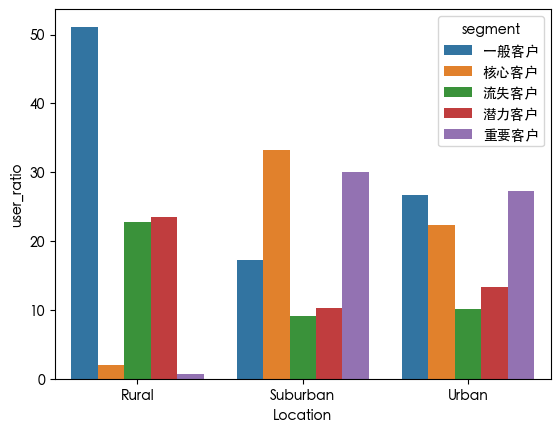

In [27]:
import seaborn as sns
plt.rcParams['font.family'] = 'Heiti TC'
sns.barplot(data=user_location, x='Location', y='user_ratio',hue='segment')

**每种客户分类中不同地区的人数占比:**

In [34]:
users_in_location = user_location.loc[:,['segment','Location','user_cnt']]

users_in_location['total_user'] = users_in_location.groupby('segment')['user_cnt'].transform('sum')
users_in_location['user_ratio'] = round(100*users_in_location['user_cnt']/users_in_location['total_user'],2)

users_in_location.sort_values(by=['segment','Location','user_ratio'], inplace=True, ascending=False, ignore_index=True)
users_in_location

,segment,Location,user_cnt,total_user,user_ratio
0,重要客户,Urban,94,201,46.77
1,重要客户,Suburban,105,201,52.24
2,重要客户,Rural,2,201,1.00
3,潜力客户,Urban,46,154,29.87
4,潜力客户,Suburban,36,154,23.38
5,潜力客户,Rural,72,154,46.75
6,流失客户,Urban,35,137,25.55
7,流失客户,Suburban,32,137,23.36
8,流失客户,Rural,70,137,51.09
9,核心客户,Urban,77,199,38.69


<Axes: xlabel='segment', ylabel='user_ratio'>

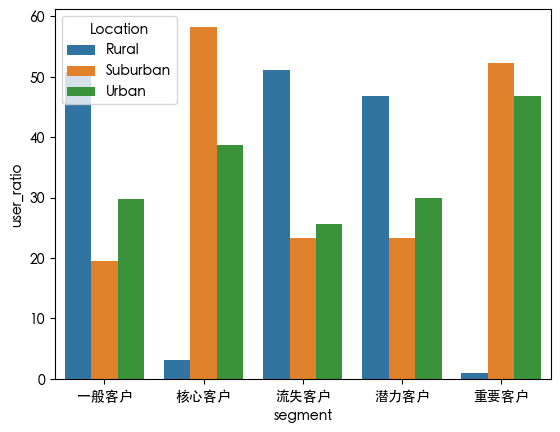

In [32]:
sns.barplot(data=users_in_location, x='segment', y='user_ratio',hue='Location')

**客户分类的地区集中度分析**：

- **Suburban**：最优结构
  - 高价值客户(核心+重要)占比：63.33%
  - 流失客户占比最低：9.17%
  - 客户金字塔呈"橄榄型"健康结构
- **Urban**：良好结构
  - 高价值客户占比：49.71%
  - 流失客户占比：10.17%
  - 客户结构相对均衡
- **Rural**：问题结构
  - 高价值客户占比极低：2.6%
  - 一般客户占比过高：51.14%
  - 流失+潜力客户占比高：46.25%
  - 客户金字塔呈"底座过大"的不稳定结构

潜力评估：

- **Rural**：潜力客户占比23.45%，转化空间最大
- **Urban**：潜力客户占比13.37%，中等增长空间
- **Suburban**：潜力客户占比10.32%，增长空间有限但质量高

差异化策略建议：

- Rural地区策略：
  - 定位：客户结构优化型市场
  - 核心优势：高价值客户严重缺失，流失风险高
  - 策略重点：提升转化率，减少流失
- Suburban地区策略：
  - 定位：价值维护与深度挖掘型市场
  - 核心优势：高价值客户集中，结构健康
  - 策略重点：维持忠诚度，预防流失
- Urban地区策略：
  - 定位：均衡发展与结构优化型市场
  - 核心特征：各层级客户分布相对均衡
  - 策略重点：提升转化效率，优化客户结构



#### 偏好产品类别与区域

下面根据地区和偏好产品类型分组，计算每个地区不同的偏好产品的占比，以及每个客户分类中不同地区的占比。

**每个地区不同偏好产品的占比:**

In [22]:
location_prefer = data.groupby(['Location','Product_Category_Preference'])['User_ID'].count().reset_index(name='user_cnt')
location_prefer['total_user'] = location_prefer.groupby('Location')['user_cnt'].transform('sum')
location_prefer['product_ratio'] = round(100*location_prefer['user_cnt']/location_prefer['total_user'],2)

location_prefer

,Location,Product_Category_Preference,user_cnt,total_user,product_ratio
0,Rural,Apparel,67,307,21.82
1,Rural,Books,57,307,18.57
2,Rural,Electronics,70,307,22.80
3,Rural,Health & Beauty,50,307,16.29
4,Rural,Home & Kitchen,63,307,20.52
5,Suburban,Apparel,71,349,20.34
6,Suburban,Books,78,349,22.35
7,Suburban,Electronics,76,349,21.78
8,Suburban,Health & Beauty,66,349,18.91
9,Suburban,Home & Kitchen,58,349,16.62


<Axes: xlabel='Location', ylabel='product_ratio'>

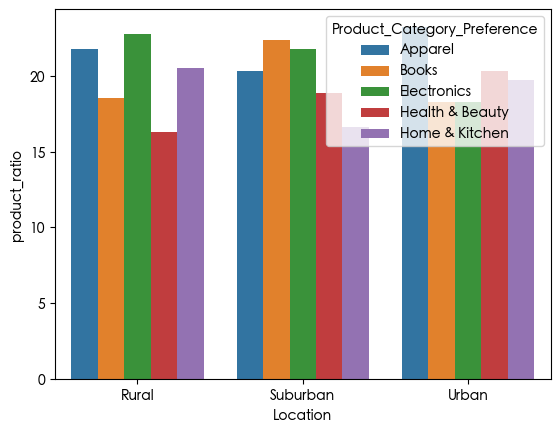

In [29]:
sns.barplot(data=location_prefer, x='Location', y='product_ratio',hue='Product_Category_Preference')

**分析**：Rural（乡村）和Suburban（郊区）两个地区的偏好产品分布相对均衡。Rural地区电子产品（22.8%）和服装（21.82%）占比最高，Suburban地区书籍（22.35%）和电子产品（21.78%）领先。在Urban（城市）地区服装（23.26%）和健康美容（20.35%）主导。

**策略**：应针对地区偏好强化优势品类（如Rural推电子产品捆绑促销、Suburban做书籍跨界营销、Urban主打时尚美妆活动），同时通过交叉销售和个性化推荐提升低占比品类的渗透率，例如在Rural推广健康美容、在Suburban推动家居用品、在Urban引入电子产品体验。

**下一步行动**：设计地区专属促销活动、优化库存分配、并利用A/B测试验证策略效果，以最大化销售机会和用户满意度。

**每种产品在不同地区的偏好占比:**

In [35]:
product_prefer = location_prefer.loc[:, ['Product_Category_Preference','Location','user_cnt']]

product_prefer['total_user'] = location_prefer.groupby('Product_Category_Preference')['user_cnt'].transform('sum')
product_prefer['product_ratio'] = round(100*product_prefer['user_cnt']/product_prefer['total_user'],2)
product_prefer

,Product_Category_Preference,Location,user_cnt,total_user,product_ratio
0,Apparel,Rural,67,218,30.73
1,Books,Rural,57,198,28.79
2,Electronics,Rural,70,209,33.49
3,Health & Beauty,Rural,50,186,26.88
4,Home & Kitchen,Rural,63,189,33.33
5,Apparel,Suburban,71,218,32.57
6,Books,Suburban,78,198,39.39
7,Electronics,Suburban,76,209,36.36
8,Health & Beauty,Suburban,66,186,35.48
9,Home & Kitchen,Suburban,58,189,30.69


<Axes: xlabel='Product_Category_Preference', ylabel='product_ratio'>

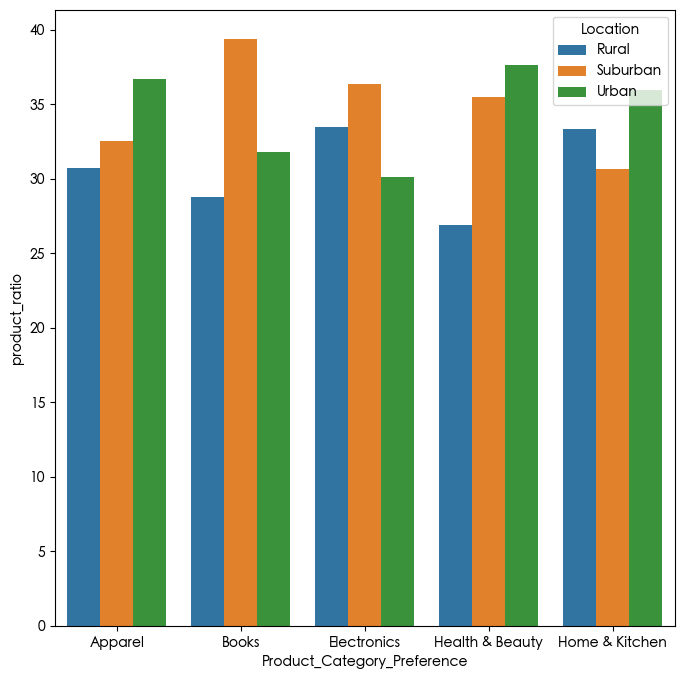

In [37]:
plt.figure(figsize = (8,8))
sns.barplot(data=product_prefer, x='Product_Category_Preference', y='product_ratio',hue='Location')

**各产品类别的地区分布显示**：Suburban在书籍（39.39%）和电子产品（36.36%）占比最高，Urban在服装（36.7%）、健康美容（37.63%）和家居用品（35.98%）领先，而Rural在电子产品（33.49%）和家居用品（33.33%）相对较强但整体偏好较低。

**策略**：应针对地区优势品类强化营销（如Suburban推书籍电子书捆绑、Urban做时尚美妆组合、Rural促电子产品优惠），同时通过交叉销售和个性化推荐挖掘潜力品类（如Rural健康美容、Suburban家居用品），以提升整体渗透和销售。

**下一步行动**：设计地区专属促销活动、优化库存分配、并利用A/B测试验证策略效果，以最大化销售机会和用户满意度。

### 其他分析

根据客户、兴趣、偏好产品进行分组，根据业务知识判断客户偏好产品与兴趣是否匹配。其中`user_cnt`是每个分组中用户的人数，`total_user`是每个客户分类的总体人数，`ratio`是每个分组的用户人数占客户分类总人数的比例。

**判断兴趣和产品偏好是否匹配：**

In [24]:
def match_interest_product(row):
    i, p = row['Interests'], row['Product_Category_Preference']
    if (i == 'Fashion' and p in ['Apparel','Electronics']) \
       or (i == 'Technology' and p in ['Electronics','Books']) \
       or (i == 'Food' and p in ['Home & Kitchen', 'Health & Beauty','Books']) \
       or (i == 'Sports' and p in ['Apparel','Electronics','Books']) \
       or (i == 'Travel' and p in ['Apparel','Electronics','Books']):
        return '匹配'
    else:
        return '不匹配'

data['match_status'] = data.apply(lambda x: match_interest_product(x), axis=1)

match_status = data.groupby(['segment','Interests','Product_Category_Preference','match_status'])['User_ID'].count().reset_index(name='user_cnt')
match_status['total_user'] = match_status.groupby(['segment','Interests'])['user_cnt'].transform('sum')
match_status['ratio'] = round(100*match_status['user_cnt']/match_status['total_user'],2)
match_status

,segment,Interests,Product_Category_Preference,match_status,user_cnt,total_user,ratio
0,一般客户,Fashion,Apparel,匹配,20,82,24.39
1,一般客户,Fashion,Books,不匹配,18,82,21.95
2,一般客户,Fashion,Electronics,匹配,13,82,15.85
3,一般客户,Fashion,Health & Beauty,不匹配,19,82,23.17
4,一般客户,Fashion,Home & Kitchen,不匹配,12,82,14.63
...,...,...,...,...,...,...,...
109,重要客户,Technology,Home & Kitchen,不匹配,19,116,16.38
110,重要客户,Travel,Apparel,匹配,3,9,33.33
111,重要客户,Travel,Books,匹配,1,9,11.11
112,重要客户,Travel,Electronics,匹配,4,9,44.44


**计算兴趣和产品匹配率：** 计算每个客户分类中，兴趣与偏好产品匹配的用户比例。

In [25]:
user_match = match_status.groupby('segment').agg(
    total_segment_users = ('user_cnt','sum'),
    total_match_users = ('user_cnt', lambda x: x[x.index.isin(match_status[match_status['match_status']=='匹配'].index)].sum())
).reset_index()
user_match['user_ratio'] = round(100*user_match['total_match_users']/user_match['total_segment_users'],2)
user_match

,segment,total_segment_users,total_match_users,user_ratio
0,一般客户,309,172,55.66
1,核心客户,199,117,58.79
2,流失客户,137,69,50.36
3,潜力客户,154,87,56.49
4,重要客户,201,104,51.74


**分析**：发现核心客户匹配率最高（58.79%），而流失客户匹配率最低（50.36%），重要客户匹配率也较低（51.74%）。这表明兴趣与产品的不匹配可能导致用户流失和价值挖掘不足

**策略**：应优先针对匹配率低的客户分类（如流失客户和重要客户）优化个性化推荐系统，强化兴趣与产品的关联营销（例如，对Technology兴趣用户推送Electronics产品），并通过A/B测试迭代推荐算法。同时，对匹配率较高的客户分类（如核心客户）维护现有策略并探索交叉销售机会。

**下一步行动**：深入分析不匹配组合的根本原因、设计定向召回活动（如向流失客户推送匹配产品优惠）、优化兴趣标签体系，并设定匹配率提升目标（如整体匹配率提升5-10%）。


### 影响销售金额的因素分析

- 目标变量：Total_Spending
- 自变量：Age, Gender, Income, Interests, Location, Time_Spent_on_Site_Minutes, Last_Login_Days_Age, Purchase_Frequency, Average_Order_Value, Product_Category_Preference, Pages_Viewed, Newsletter_Subscription

In [42]:
features = ['Age', 'Gender', 'Income', 'Interests', 'Location', 'Time_Spent_on_Site_Minutes', 'Last_Login_Days_Ago', 'Purchase_Frequency', 'Average_Order_Value', 'Product_Category_Preference', 'Pages_Viewed', 'Newsletter_Subscription']

spending_data = data[features]

new_data = pd.get_dummies(data=spending_data, columns=['Location','Interests','Product_Category_Preference'],drop_first=True, dtype='int')
new_data.head()


,Age,Gender,Income,Time_Spent_on_Site_Minutes,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Pages_Viewed,Newsletter_Subscription,Location_Suburban,Location_Urban,Interests_Food,Interests_Sports,Interests_Technology,Interests_Travel,Product_Category_Preference_Books,Product_Category_Preference_Electronics,Product_Category_Preference_Health & Beauty,Product_Category_Preference_Home & Kitchen
0,56,Male,66266,584,5,7,528.29,38,True,1,0,0,1,0,0,1,0,0,0
1,46,Female,30581,432,15,1,567.00,40,False,0,0,0,0,1,0,0,1,0,0
2,32,Female,109943,306,28,7,475.29,1,True,1,0,0,1,0,0,0,0,0,0
3,60,Female,91369,527,18,6,450.50,29,False,1,0,0,0,0,0,0,0,0,0
4,25,Male,49255,53,2,19,145.11,10,True,1,0,0,0,0,1,0,0,1,0


In [45]:

for i in ['Gender','Newsletter_Subscription']:
    label_encoder = LabelEncoder()
    new_data[i] = label_encoder.fit_transform(new_data[i])

new_data.head()

,Age,Gender,Income,Time_Spent_on_Site_Minutes,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Pages_Viewed,Newsletter_Subscription,Location_Suburban,Location_Urban,Interests_Food,Interests_Sports,Interests_Technology,Interests_Travel,Product_Category_Preference_Books,Product_Category_Preference_Electronics,Product_Category_Preference_Health & Beauty,Product_Category_Preference_Home & Kitchen
0,56,1,66266,584,5,7,528.29,38,1,1,0,0,1,0,0,1,0,0,0
1,46,0,30581,432,15,1,567.00,40,0,0,0,0,0,1,0,0,1,0,0
2,32,0,109943,306,28,7,475.29,1,1,1,0,0,1,0,0,0,0,0,0
3,60,0,91369,527,18,6,450.50,29,0,1,0,0,0,0,0,0,0,0,0
4,25,1,49255,53,2,19,145.11,10,1,1,0,0,0,0,1,0,0,1,0


In [50]:
scaler = MinMaxScaler()
X = scaler.fit_transform(new_data)
y = data['Total_Spending']

In [51]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         Total_Spending   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     91.22
Date:                Sat, 15 Nov 2025   Prob (F-statistic):          2.92e-201
Time:                        21:28:38   Log-Likelihood:                -8264.0
No. Observations:                1000   AIC:                         1.657e+04
Df Residuals:                     980   BIC:                         1.667e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        365.3565    155.028      2.357      0.0

#### 模型解释

**模型整体评估**：R-squared——0.639，表示模型能解释63.9%的`Total_Spending`方差。调整后R-squared为0.632，考虑到特征数量，模型拟合度较好，说明特征集对预测消费总额有一定解释力。

**F-statistic**：91.22，p值极低。表明模型整体统计显著，即特征联合对`Total_Spending`的影响不是随机的。

**样本量**：1000个观察值，模型自由度（Df Model）为19，残差自由度（Df Residuals）为980。

**其他指标**：

- Omnibus和Jarque-Bera测试的p值均为0.000，表明残差可能不服从正态分布，这可能会影响系数推断的精确性。
- Durbin-Watson统计量为2.185，接近2，说明残差无明显自相关，模型设定合理。
- 条件数（Cond. No.）为20.5，低于30，表明多重共线性问题不严重，特征间独立性尚可。

**显著正影响特征（p值<0.05）**：

- **Average_Order_Value** (x7): 系数7860.94，p=0.000
  影响最大：平均订单价值每增加1单位，总消费增加约7861单位。这是最关键驱动因素。
- **Purchase_Frequency** (x6): 系数1106.99，p=0.000
  购买频率每增加1单位，总消费增加约1107单位。
- **Location_Suburban** (x10): 系数1239.67，p=0.000
  郊区用户比农村（基准组）总消费高约1240单位。
- **Location_Urban** (x11): 系数1010.35，p=0.000
  城市用户比农村总消费高约1010单位。
- **Interests_Sports** (x13): 系数497.03，p=0.000
  兴趣为体育的用户总消费较高。
- **Interests_Technology** (x14): 系数384.45，p=0.001
  兴趣为技术的用户总消费较高。
- **Interests_Food** (x12): 系数263.49，p=0.010
  兴趣为食品的用户总消费较高。

**显著负影响特征（p值<0.05）**：

- **Interests_Travel** (x15): 系数-243.00，p=0.017
  兴趣为旅行的用户总消费较低，可能该群体更倾向线下消费或对平台产品不敏感。
- **Product_Category_Preference_Books** (x16): 系数-232.02，p=0.014
  偏好书籍类产品的用户总消费较低，可能书籍属低价品类。
- **Product_Category_Preference_Electronics** (x17): 系数-289.75，p=0.002
  偏好电子产品用户总消费较低，可能因电子产品购买频次低或竞争激烈。

**不显著特征（p值>0.05）**：

Age、Gender、Income、Time_Spent_on_Site_Minutes、Last_Login_Days_Ago、Pages_Viewed、Newsletter_Subscription等。
这些特征对总消费无显著影响，说明它们不是关键预测因子。例如，收入（Income）系数为正但不显著，可能因消费行为受其他因素调节。

**有用信息总结与业务启示**：

1. **核心驱动因素**: `Average_Order_Value`和`Purchase_Frequency`是提升总消费的最强杠杆。企业应聚焦提高客单价（如捆绑销售、升级推荐）和购买频次（如订阅计划、促销活动）。
2. **地区差异**：郊区和城市用户消费显著高于农村。策略应优先资源投入高潜力地区，同时探索农村市场低消费原因（如物流限制、产品匹配度）。
3. **兴趣导向**：体育、技术、食品兴趣用户消费更高，可针对这些兴趣开发专属内容或产品线。旅行兴趣用户消费低，需调查原因并调整营销策略。
4. **产品类别影响**：书籍和电子产品偏好与低消费相关，可能这些品类客单价低或用户价值不高。考虑优化品类结构，推动高毛利产品交叉销售。
5. **无效特征**：人口统计特征（年龄、性别）和行为特征（网站停留时间、登录频率）不显著，建议在后续模型中剔除或深入分析其交互作用，以简化模型。



**下一步行动建议**：

- **短期策略**：
    - 针对高价值用户（郊区和城市）推出忠诚度计划，提升复购率。
    - 利用兴趣数据（体育、技术）进行个性化推荐，提高转化率。
    - 对书籍和电子产品类别用户，引导向高客单价品类（如健康美容）迁移。
- **长期优化**：
    - 收集更多数据（如促销响应、客户服务交互）以改进模型。
    - 进行A/B测试验证关键驱动因素，例如测试不同兴趣群体的营销信息。
    - 考虑使用正则化回归（如Lasso）自动特征选择，提高模型泛化能力。
